In [1]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ypb65u9_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ypb65u9_
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 7fa17d78c45f4f642faa89f4c0e590c400f74225
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=18deedf9fbfc23fb2d7fceb900a5f40a19bccbf4f57ec599ba9995b4a328c2e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-zg6oyhvx/wheels/d5/11/03/7aca746a2c0e09f279b10436ced7175926bc38f650b736a648
Successfully built segment-anything


In [2]:
!pip install -q rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 53.2 MB/s eta 0:00:00


In [3]:
# Baixando modelo treinado
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2023-04-11 17:57:54--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 65.8.158.63, 65.8.158.115, 65.8.158.116, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|65.8.158.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   134MB/s    in 15s     

2023-04-11 17:58:10 (159 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [4]:
#Importando bibliotecas
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import cv2
import rasterio as rio
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor 

In [19]:
# Lendo imagem como array
src = rio.open('/content/drive/MyDrive/Dados_PDI/CUBO_GEOBIA.tif')
list_band = [src.read(i+1) for i in range(src.count)]
img = np.dstack(list_band)

In [6]:
# Convertendo tipo de dados
img = img[:,:,:3].astype(np.uint8)

In [7]:
# Rodando segmentação
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

masks = mask_generator.generate(img)

In [ ]:
# Alguns parâmetros
'''mask_generator_ = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.9,
    stability_score_thresh=0.96,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  
)

masks = mask_generator_.generate(img)'''

In [8]:
# Função para mostrar os segmentos com cores diferentes
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

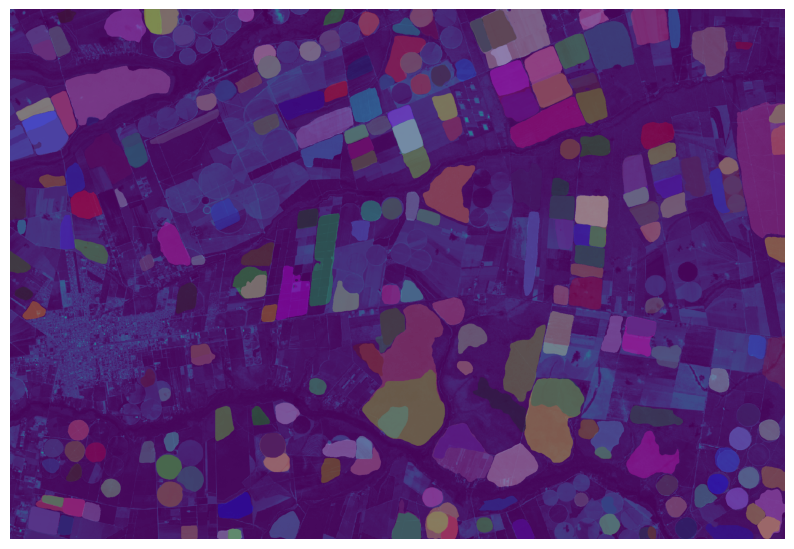

In [29]:
#Visualizando
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,2])
show_anns(masks)
plt.axis('off')
plt.show() 